In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix

import seaborn as sns

Dla celów algorytmów klasyfikujących, należy stworzyć kilka klas, do których będa mogły być przypisywane dane uczące. Zdecydowałem się na podział możliwie równo oddający poszczególne klasy, nie licząc najbardziej licznej - zdecydowana większość wierszy ma przyrost obserwujących równy `0` - oraz klasy odpowadającej najbardziej popularnym repozytoriom, których jest stosunkowo mało.

In [2]:
data = pd.read_pickle("../../../data/03_training_set/training_set.pkl")
bins = (-np.inf, 0, 15, 35, 75, 200, np.inf)
group_names = ['0.brak', '1.bardzo mało', '2.mało', '3.średnio', '4.dużo', '5.bardzo dużo']
data['new_watchers'] = pd.cut(data['new_watchers'], bins=bins, labels=group_names)
data['new_watchers'].value_counts()

0.brak           1807749
3.średnio            791
4.dużo               656
1.bardzo mało        636
2.mało               607
5.bardzo dużo        162
Name: new_watchers, dtype: int64

In [3]:
data['new_watchers'].unique()

[5.bardzo dużo, 3.średnio, 2.mało, 1.bardzo mało, 0.brak, 4.dużo]
Categories (6, object): [0.brak < 1.bardzo mało < 2.mało < 3.średnio < 4.dużo < 5.bardzo dużo]

In [4]:
labels = LabelEncoder()
data['new_watchers'] = labels.fit_transform(data['new_watchers'])

In [5]:
labels.classes_

array(['0.brak', '1.bardzo mało', '2.mało', '3.średnio', '4.dużo',
       '5.bardzo dużo'], dtype=object)

In [6]:
data['new_watchers'].value_counts()

0    1807749
3        791
4        656
1        636
2        607
5        162
Name: new_watchers, dtype: int64

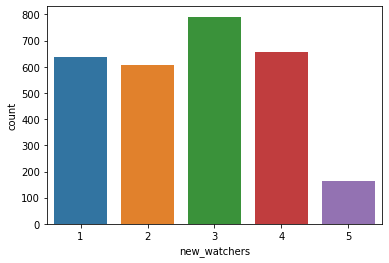

In [7]:
sns.countplot(data[data['new_watchers'] != 0]['new_watchers'])

In [8]:
X = data.drop(['new_watchers'], axis=1)
y = data['new_watchers']

s = StandardScaler()
X = s.fit_transform(X)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.40, random_state=42)

In [9]:
y_test.value_counts()

0    723077
3       297
4       280
1       263
2       258
5        66
Name: new_watchers, dtype: int64